In [2]:
import numpy as np
from io import StringIO
from collections import deque
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mylibrary as mylib
from mylibrary import euclidean_distance

%matplotlib inline

In [3]:
class Point:
    def __init__(self, loc):
        self.loc = loc
        self.is_visited = False
        self.is_noise = False
        self.cluster_id = -1
        
    def label_noise(self, is_noise=True):
        self.is_noise = is_noise
        
    def label_cluster_id(self, c_id = -1):
        self.cluster_id = c_id
    def label_is_visited(self, is_visited=True):
        self.is_visited = True
    
    def __repr__(self):
         return str(self.loc) + " in cluster: " + str(self.cluster_id) 

In [4]:
def preprocess(data):
    """
    Purpose:
        transfer each record of data into the object of point
    Input:
        data: a two dimension matrix
    Output:
        a list of Point objects
    """
    return list(map(lambda x: Point(x), data))

In [5]:
def region_query(data, pt, eps, fun):
    """
    Purpose:
        get all neighbor of point pt within eps distance
    Input:
        data: a list of Point object
        pt: a Point
        eps: the epsilon distance
        fun: the function to calculate distance
    Output:
        neighbors: a list of Points
    """
    neighbors = []
    for neighbor in data:
        if fun(neighbor.loc, pt.loc) <= eps:
            neighbors.append(neighbor)
    return neighbors

In [6]:
def expand_cluster(data, pt, neighbors, cluster_id, eps, min_pts):
    """
    Purpose:
        generate a cluster from data
    Input:
        data: a list of Points
        pt: a Point
        neighbors: a list of Points
        cluster_id: int, current cluster id
        eps: the epsilon distance
        min_pts: the minimum number of neighbors.
    Output:
        the updated data
    """
    pt.label_cluster_id(cluster_id)
    neighbors.remove(pt)
    queue = deque(neighbors)
    
    while len(queue) != 0:
        neighbor = queue.popleft()
        if neighbor.is_noise:
            neighbor.label_noise(False)
            neighbor.label_cluster_id(cluster_id)
        if neighbor.cluster_id == -1:
            neighbor.label_cluster_id(cluster_id)
            neighbor_neighbors = region_query(data, neighbor, eps, euclidean_distance)
            if len(neighbor_neighbors) >= min_pts:
                queue.extend(neighbor_neighbors)
    return data

In [7]:
def dbscan(data, eps, min_pts):
    """
    Purpose:
        dbscan algorithm which is to do density base clustering.
    Input:
        data: a list of Points
        eps: the epsilon distance
        min_pts: the minimum number of neighbors.
    Output:
        cluster_id: the last cluster_id which is same as the number of iterations.
    """
    cluster_id = 0
    for pt in data:
        if pt.cluster_id == -1:
            neighbors = region_query(data, pt, eps, euclidean_distance)
            if len(neighbors) < min_pts:
                pt.label_noise(True)
            else:
                cluster_id += 1
                expand_cluster(data, pt, neighbors, cluster_id, eps, min_pts)
    return cluster_id

In [8]:
def plot_dbscan(data, clusters_num):
    label_set = set(np.append(-2, np.arange(clusters_num))+1)
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        cluster = np.asarray(list(map(lambda y: y.loc, filter(lambda x: x.cluster_id == label, data))))
        if len(cluster) != 0:
            plt.scatter(cluster[:,0], cluster[:,1], s=20, c=color_map[label],
                        alpha=0.3, label=label)
    plt.title("clusters number: " + str(clusters_num))
    plt.legend(loc='best')
    plt.show()
    plt.close() 

## Test

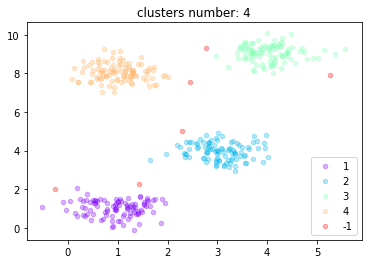

In [9]:
data = mylib.generate_data()
data = preprocess(data)
eps = 0.5
pt = data[0]
min_pts = 5
clusters_num = dbscan(data, eps, min_pts)
plot_dbscan(data, clusters_num)

In [44]:
import pickle

In [47]:
pickle.dump( data, open( "save.p", "wb" ) )

In [59]:
abc = pickle.load( open( "save.p", "rb" ) )

In [50]:
data

array([[-7.72277214e-01, -5.53017570e-01],
       [-1.02078782e-01, -4.63219601e-01],
       [-6.86879011e-01, -6.11953844e-01],
       [ 7.49863516e-02, -1.00658121e+00],
       [-1.01012782e+00, -1.97910863e-01],
       [ 7.05160799e-02,  5.25784392e-01],
       [ 4.43262536e-01,  1.63735508e-01],
       [ 5.15415528e-01, -1.05553318e-01],
       [-7.50427547e-01, -7.80512789e-01],
       [ 3.90706076e-01,  4.10401778e-01],
       [ 2.35494799e-01, -4.68519579e-01],
       [-6.42089918e-01, -6.14006826e-01],
       [-5.17427005e-01, -8.92450899e-01],
       [ 6.84987667e-01, -6.93386577e-01],
       [-4.07092840e-01,  2.69317635e-01],
       [-2.61853330e-02, -5.09402456e-01],
       [ 5.15660447e-01,  9.62685570e-01],
       [ 3.14725837e-01,  9.63083502e-01],
       [ 2.76574593e-01, -4.07747542e-01],
       [ 5.13085677e-01, -8.80457982e-01],
       [-3.87451738e-01, -3.62170641e-01],
       [ 5.40339159e-02, -5.27013994e-01],
       [ 4.40739614e-01, -2.32026021e-01],
       [ 9.

In [52]:
data = mylib.generate_circle()

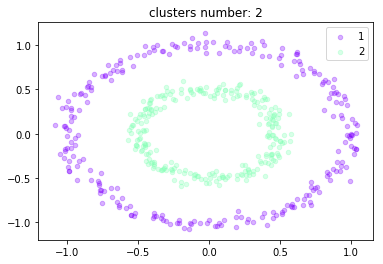

In [56]:
data = mylib.generate_circle()
data = preprocess(data)
eps = 0.2
min_pts = 5
clusters_num = dbscan(data, eps, min_pts)
plot_dbscan(data, clusters_num)

In [57]:
pickle.dump( data, open( "res.p", "wb" ) )

In [32]:
data, labels = mylib.get_data("../data/cho.txt")
#data_pca = mylib.pca(data)
data = preprocess(data)
eps = 3
min_pts = 4
clusters_num = dbscan(data, eps, min_pts)
#plot_dbscan(data, clusters_num)

In [34]:
data, labels = mylib.get_data("../data/iyer.txt")
data = preprocess(data)
eps = 5
min_pts = 4
clusters_num = dbscan(data, eps, min_pts)
#plot_dbscan(data, clusters_num)

In [36]:
np.asarray([cluster.cluster_id for cluster in data])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [21]:
data[1]

[-0.21   0.19   0.86   0.04  -0.35  -0.39  -0.51  -0.2    0.     0.77
  0.41   0.14  -0.45  -1.23  -0.325  0.   ] in cluster: 1

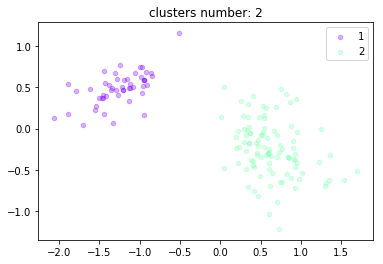

In [84]:
data, labels = mylib.get_data("../data/new_dataset_1.txt")
data_pca = mylib.pca(data)
data = preprocess(data)
eps = 1
min_pts = 3
clusters_num = dbscan(data, eps, min_pts)
plot_dbscan(data_pca, data, clusters_num)

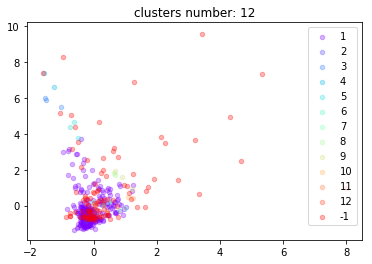

In [150]:
data, labels = mylib.get_data("../data/iyer.txt")
data_pca = mylib.pca(data)
data = preprocess(data)
eps = 1.25
min_pts = 2
clusters_num = dbscan(data, eps, min_pts)
plot_dbscan(data_pca, data, clusters_num)

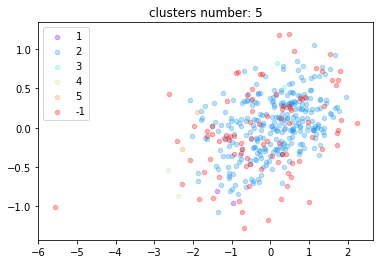

In [160]:
data, labels = mylib.get_data("../data/cho.txt")
data_pca = mylib.pca(data)
data = preprocess(data)
eps = 1.25
min_pts = 2
clusters_num = dbscan(data, eps, min_pts)
plot_dbscan(data_pca, data, clusters_num)

In [81]:
def plot_dbscan(data_pca, data, clusters_num):
    label_set = set(np.append(-2, np.arange(clusters_num))+1)
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        #cluster = np.asarray(list(map(lambda y: y.loc, filter(lambda x: x.cluster_id == label, data))))
        cluster = data_pca[np.where(np.asarray([pt.cluster_id for pt in data]) == label)]
        if len(cluster) != 0:
            plt.scatter(cluster[:,0], cluster[:,1], s=20, c=color_map[label],
                        alpha=0.3, label=label)
    plt.title("clusters number: " + str(clusters_num))
    plt.legend(loc='best')
    plt.show()
    plt.close() 

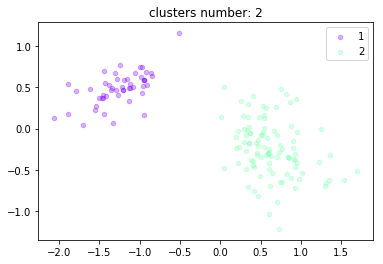